# Federico Ariton
### Higher Diploma in Science in Data Analytics for Business
### CA 2 Integrated
### Student Number:sba22090

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Importing the dataset
Employee = pd.read_csv('Employee_Attrition.csv')
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,...,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,...,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,...,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,...,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN


In [3]:
# Size of the dataset
Employee.shape

(1470, 35)

In [4]:
# Implementing 'describe' method provides a summary of the
# statistics of the dataset numeric columns.
Employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [5]:
Employee.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


In [6]:
# Analyzing missing values in the dataset
Employee.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [7]:
# Calling the 'info' method on the dataset 
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [8]:
# Implementing the data types of each column, and check the value,string,int...
Employee.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [9]:
# Describing the value that has object,that we previously visualize in the .dtypes
Employee.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [10]:
# Visualizing the name of the columns
Employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

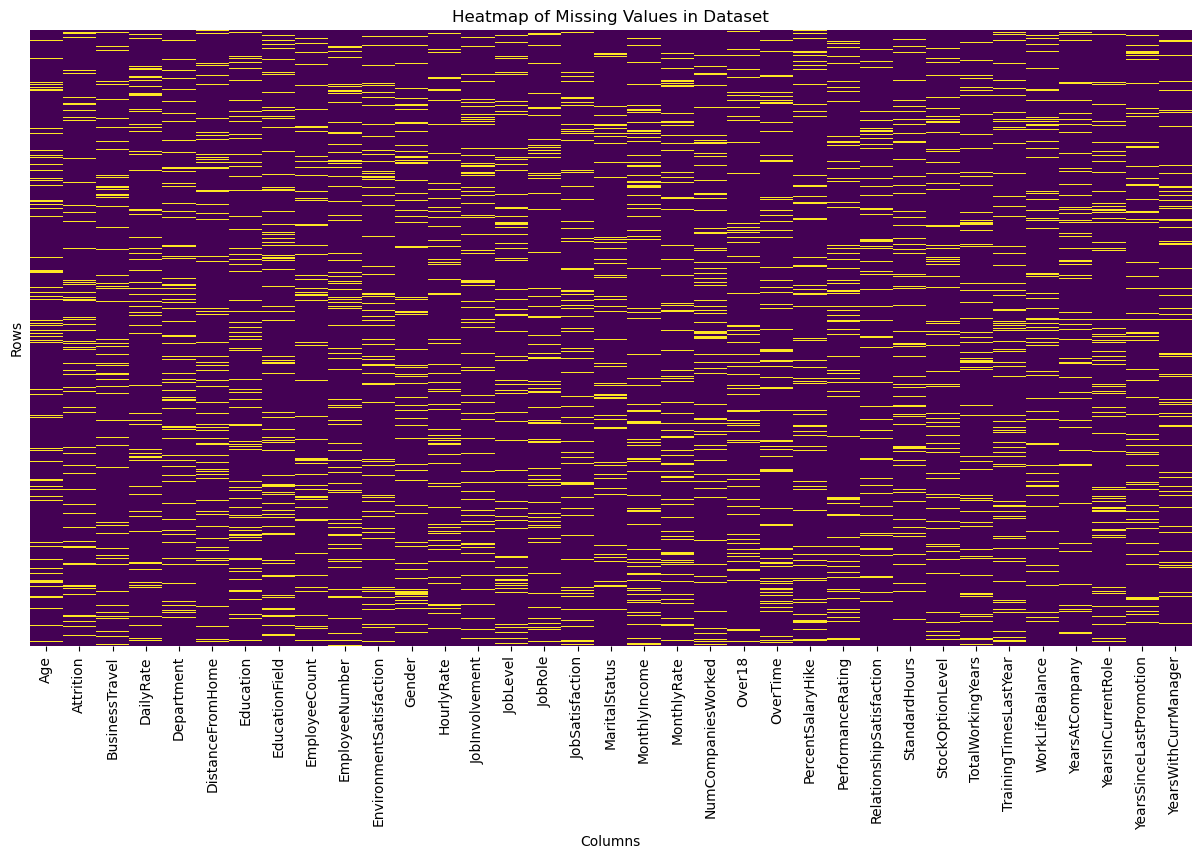

In [11]:
# Creating a heatmap for missing values
plt.figure(figsize=(15, 8))
sns.heatmap(Employee.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [12]:
missing_values = Employee.isnull().sum()
missing_values

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [13]:
print(Employee['EnvironmentSatisfaction'])

0       2.146294
1       3.470803
2       3.979420
3       3.734705
4       1.079412
          ...   
1465    3.171444
1466    4.284094
1467    2.152282
1468    4.095580
1469    1.738502
Name: EnvironmentSatisfaction, Length: 1470, dtype: float64


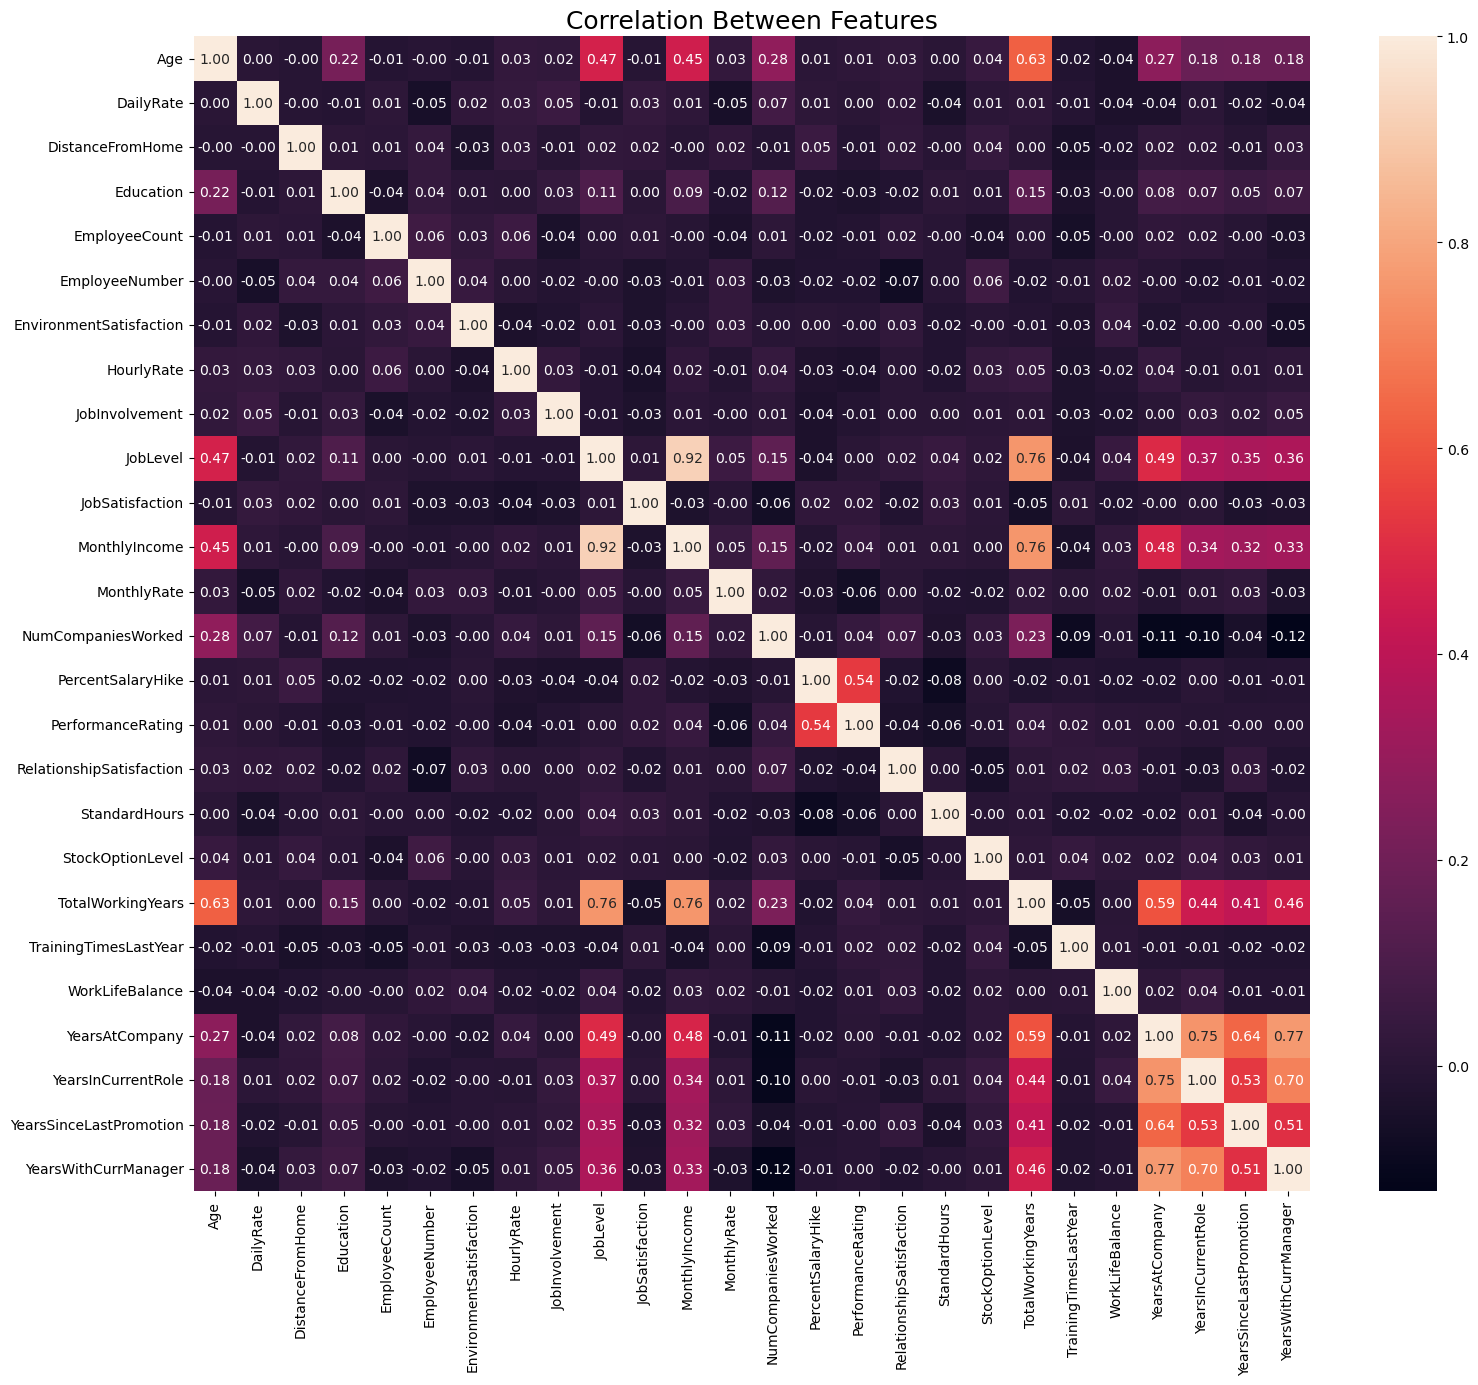

In [14]:
# Visualizing the features in our data set measuring how
# close are realted two variable to each other
plt.figure(figsize=(18,15))
sns.heatmap(Employee.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)
plt.show()

In [15]:
import numpy as np

correlation_matrix = Employee.corr()



# Re-extracting the upper triangle of the correlation matrix
upper_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flattening the matrix and removing NaN values
correlation_pairs = upper_corr_matrix.unstack().dropna()

# Sorting the pairs by absolute correlation value in descending order
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Displaying the sorted correlation pairs
sorted_correlation_pairs.head(30)  # Displaying the top 10 pairs for brevity



MonthlyIncome            JobLevel                   0.923510
YearsWithCurrManager     YearsAtCompany             0.767222
TotalWorkingYears        MonthlyIncome              0.757637
                         JobLevel                   0.756814
YearsInCurrentRole       YearsAtCompany             0.753423
YearsWithCurrManager     YearsInCurrentRole         0.702790
YearsSinceLastPromotion  YearsAtCompany             0.639672
TotalWorkingYears        Age                        0.625620
YearsAtCompany           TotalWorkingYears          0.593884
PerformanceRating        PercentSalaryHike          0.538735
YearsSinceLastPromotion  YearsInCurrentRole         0.532027
YearsWithCurrManager     YearsSinceLastPromotion    0.509521
YearsAtCompany           JobLevel                   0.494295
                         MonthlyIncome              0.476981
JobLevel                 Age                        0.467031
YearsWithCurrManager     TotalWorkingYears          0.459003
MonthlyIncome           

In [16]:
duplicated_data = Employee.duplicated().any()
duplicated_data

False

In [17]:
Employee[['Age', 'Attrition']]



,Age,Attrition
0,41.920786,Yes
1,51.589037,No
2,33.131540,Yes
3,34.707073,No
4,24.790188,No
...,...,...
1465,37.421699,No
1466,34.957777,No
1467,26.884296,No
1468,NaN,No


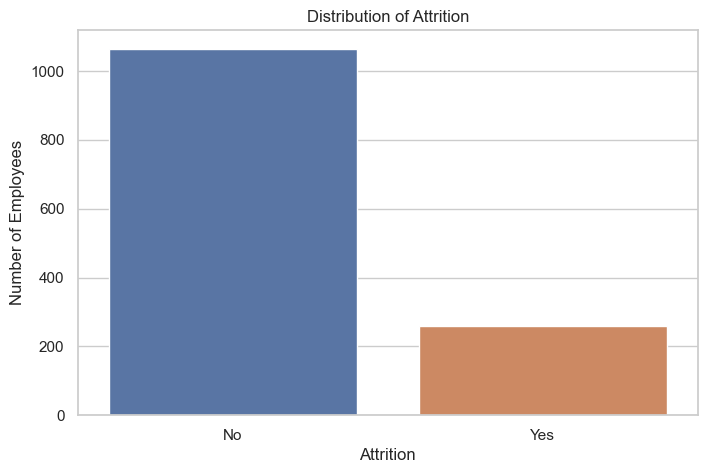

No     1065
Yes     258
Name: Attrition, dtype: int64

In [18]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'Attrition' column
attrition_count = Employee['Attrition'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_count.index, y=attrition_count.values)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

attrition_count

# Data Cleanning

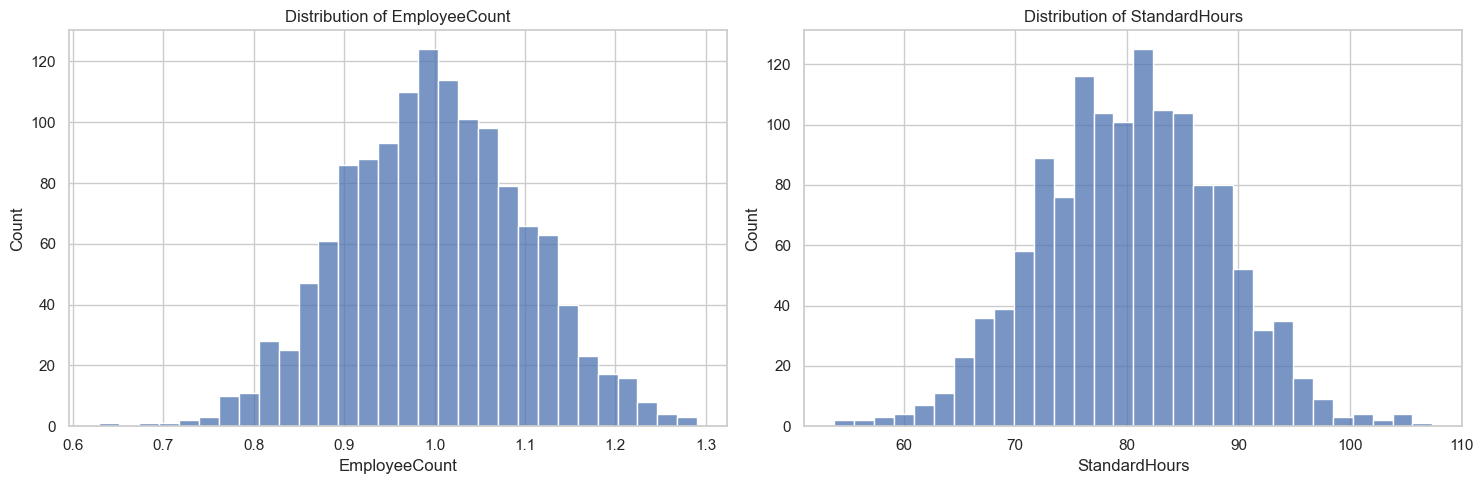

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'EmployeeCount' and 'StandardHours'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of EmployeeCount
sns.histplot(Employee['EmployeeCount'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of EmployeeCount')

# Distribution of StandardHours
sns.histplot(Employee['StandardHours'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of StandardHours')

plt.tight_layout()
plt.show()


In [20]:
# Analyzing the relationship between 'EmployeeCount', 'StandardHours' and key variables
key_variables = ['Attrition', 'JobSatisfaction', 'WorkLifeBalance']

# Creating a new DataFrame for correlation analysis
correlation_data = Employee[['EmployeeCount', 'StandardHours'] + key_variables]

# Computing correlation
correlation_matrix = correlation_data.corr()

# Displaying the correlation matrix
correlation_matrix[['EmployeeCount', 'StandardHours']]


,EmployeeCount,StandardHours
EmployeeCount,1.000000,-0.003399
StandardHours,-0.003399,1.000000
JobSatisfaction,0.011087,0.030721
WorkLifeBalance,-0.004015,-0.018620


In [21]:
# Dropping the columns 'EmployeeCount', 'StandardHours', 'Over18', and 'EmployeeNumber'
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
Employee = Employee.drop(columns=columns_to_drop)

# Displaying the first few rows of the cleaned dataframe
Employee


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,3.470803,Male,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,3.979420,Male,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,1.079412,Male,...,3.282183,NaN,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,3.171444,Male,...,2.968558,3.020184,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,4.284094,Male,...,2.800889,1.014690,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,2.152282,Male,...,NaN,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,4.095580,Male,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN


In [22]:
# Checking for missing values in each column
missing_values = Employee.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Percentage of missing values
missing_percentage = (missing_values / len(Employee)) * 100

# Creating a DataFrame to display missing data stats
missing_stats = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_stats


,Missing Values,Percentage
Age,147,10.0
MonthlyIncome,147,10.0
YearsSinceLastPromotion,147,10.0
YearsInCurrentRole,147,10.0
YearsAtCompany,147,10.0
WorkLifeBalance,147,10.0
TrainingTimesLastYear,147,10.0
TotalWorkingYears,147,10.0
StockOptionLevel,147,10.0
RelationshipSatisfaction,147,10.0


In [23]:
# Identifying numerical and categorical columns
numerical_cols = Employee.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = Employee.select_dtypes(include=['object']).columns.tolist()

# Separating columns with missing values into numerical and categorical
missing_numerical_cols = [col for col in numerical_cols if col in missing_values.index]
missing_categorical_cols = [col for col in categorical_cols if col in missing_values.index]

missing_numerical_cols, missing_categorical_cols


(['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'OverTime'])

In [24]:
# Imputation for numerical columns
for col in missing_numerical_cols:
    median_value = Employee[col].median()
    Employee[col].fillna(median_value, inplace=True)

# Imputation for categorical columns
for col in missing_categorical_cols:
    mode_value = Employee[col].mode()[0]
    Employee[col].fillna(mode_value, inplace=True)

# Check if there are any missing values left
Employee.isnull().sum().sum()


0

In [25]:
Employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [26]:
Employee.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,3.979420,Male,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,1.079412,Male,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
5,29.766336,No,Travel_Frequently,900.495555,Research & Development,1.805415,3.015658,Life Sciences,4.198522,Male,...,3.085446,2.798835,0.000000,6.694851,1.871592,2.046544,6.092499,8.389254,3.131537,7.060896
6,61.934723,No,Travel_Rarely,1284.456352,Research & Development,2.502578,3.015658,Medical,2.845946,Female,...,4.473227,0.809695,3.190519,11.226132,2.690934,2.198286,5.422160,0.000000,0.000000,0.000000
7,27.098235,No,Travel_Rarely,782.958705,Research & Development,22.329189,0.923262,Life Sciences,3.194771,Male,...,4.173202,2.062221,0.891104,1.058393,1.868045,2.899807,0.962310,0.000000,0.000000,0.000000
8,30.379999,No,Travel_Frequently,195.346240,Research & Development,6.920808,3.209049,Life Sciences,4.205716,Male,...,4.395156,2.156785,0.000000,10.088953,1.905135,3.104763,9.894773,7.992665,1.151091,7.080628
9,35.373614,No,Travel_Rarely,1277.914019,Research & Development,28.618060,3.144818,Technical Degree,2.887313,Male,...,2.895479,1.933506,1.947497,18.805415,3.008464,2.105678,5.959244,6.414024,0.967140,6.447820


In [27]:
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,2.146294,Male,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,6.920808,1.035333,Life Sciences,3.470803,Male,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,3.979420,Male,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,3.734705,Female,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,1.079412,Male,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


# ENCONDING DATA

In [28]:
# Select only the categorical columns
categorical_data = Employee.select_dtypes(include=['object'])

# Display the categorical data
print(categorical_data.head())  # This will display the first few rows

  Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences    Male   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently                   Sales  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No  


In [29]:
# Correct way to select multiple columns
selected_columns = ["BusinessTravel","Attrition", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
selected_data = Employee[selected_columns]

# Example of label encoding (if needed)
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
for column in selected_columns:
    Employee[column] = l_encoder.fit_transform(Employee[column].astype(str))

# Display the result
Employee


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,...,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,...,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,...,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


# EDA

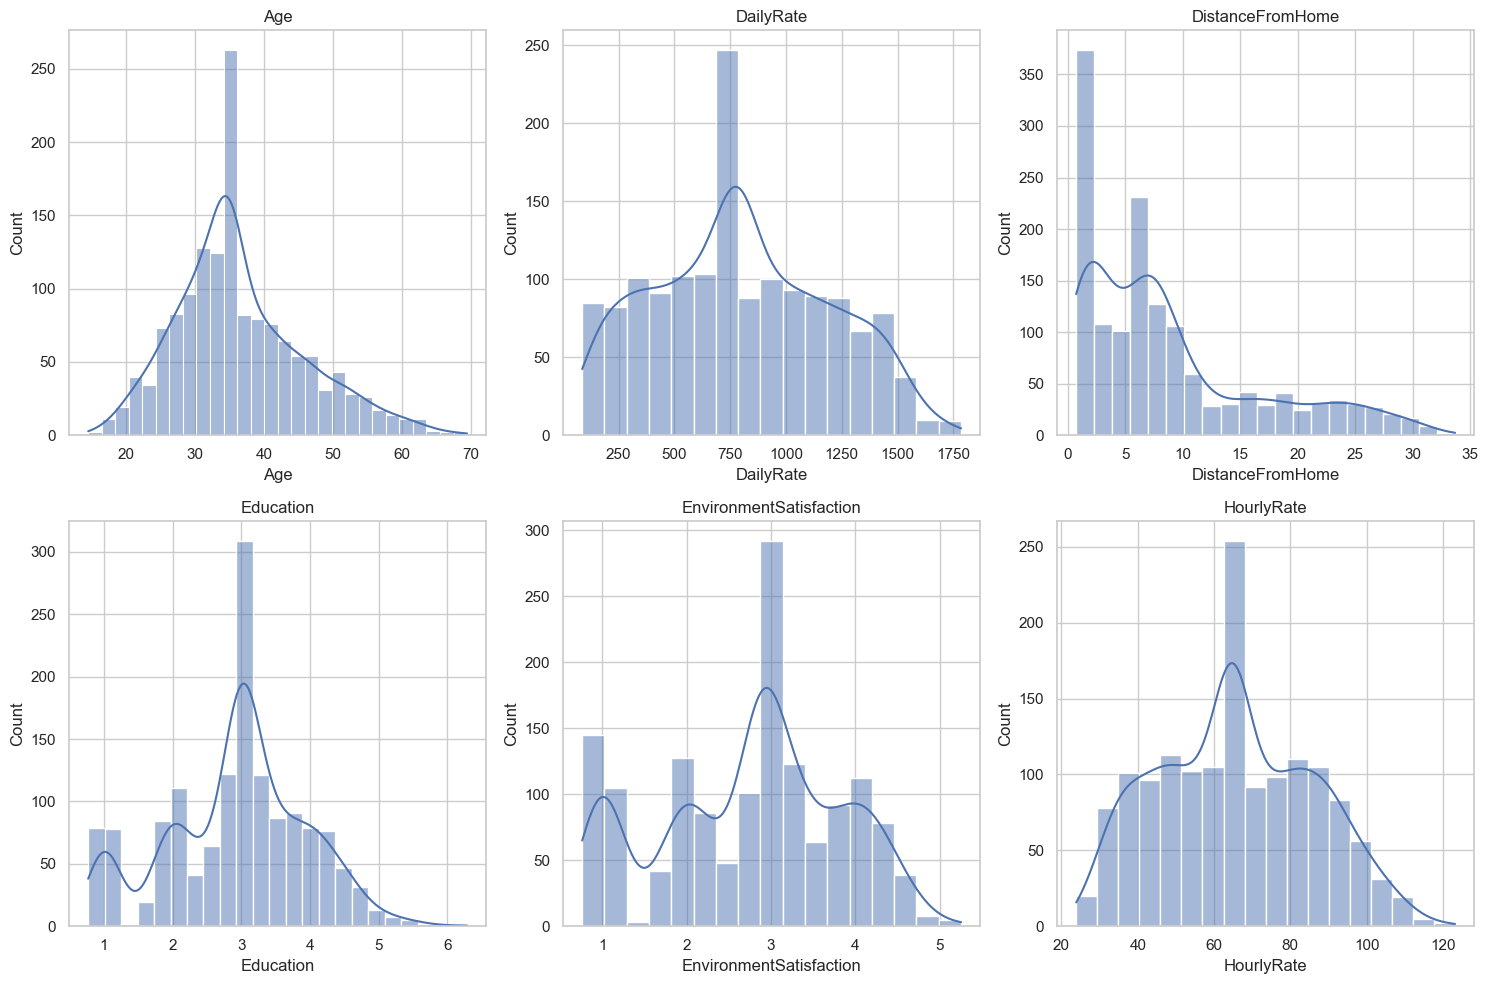

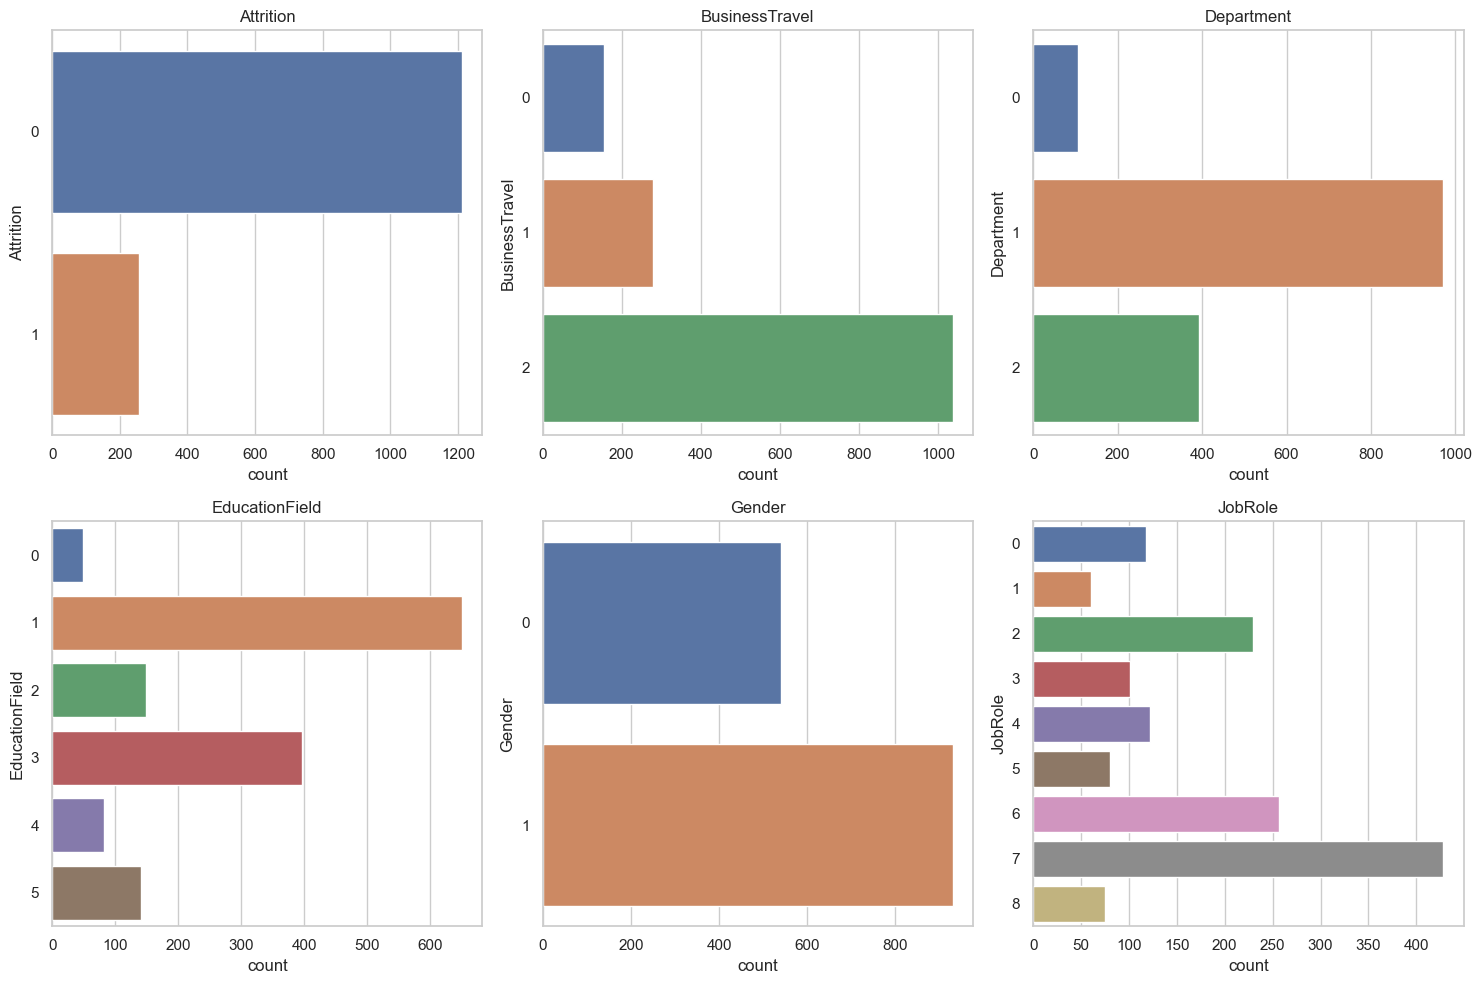

In [30]:
# Selecting a subset of numerical and categorical columns for visualization
sample_numerical_cols = numerical_cols[:6]  # First 6 numerical columns
sample_categorical_cols = categorical_cols[:6]  # First 6 categorical columns

# Plotting histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(Employee[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plotting bar plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=Employee[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Standarizing the data

In [81]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(Employee)

df_scaled = pd.DataFrame(df_scaled, columns=Employee.columns)

df_scaled['Attrition'] = Employee['Attrition']
df = df_scaled

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [82]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


# Now, we'll standardize the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Employee[numerical_cols] = scaler.fit_transform(Employee[numerical_cols])

# Display the transformed data
Employee.head()

# Splitting Data into Training and Testing

In [83]:
# Extracting the target variable 'DEATH'
# The variable 'y' is what the model will be trained to predict.
y = Employee['Attrition']

# Dropping the 'DEATH' column from the Covid_Data dataset
# to create the feature set.
x = Employee.drop('Attrition', axis=1)

In [84]:
# Splitting the dataset into training and testing sets.
# Will be use 20% of the data for testing, and the rest for training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Getting the shape of the training and testing sets for both features (X) and target (y).
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

# PCA

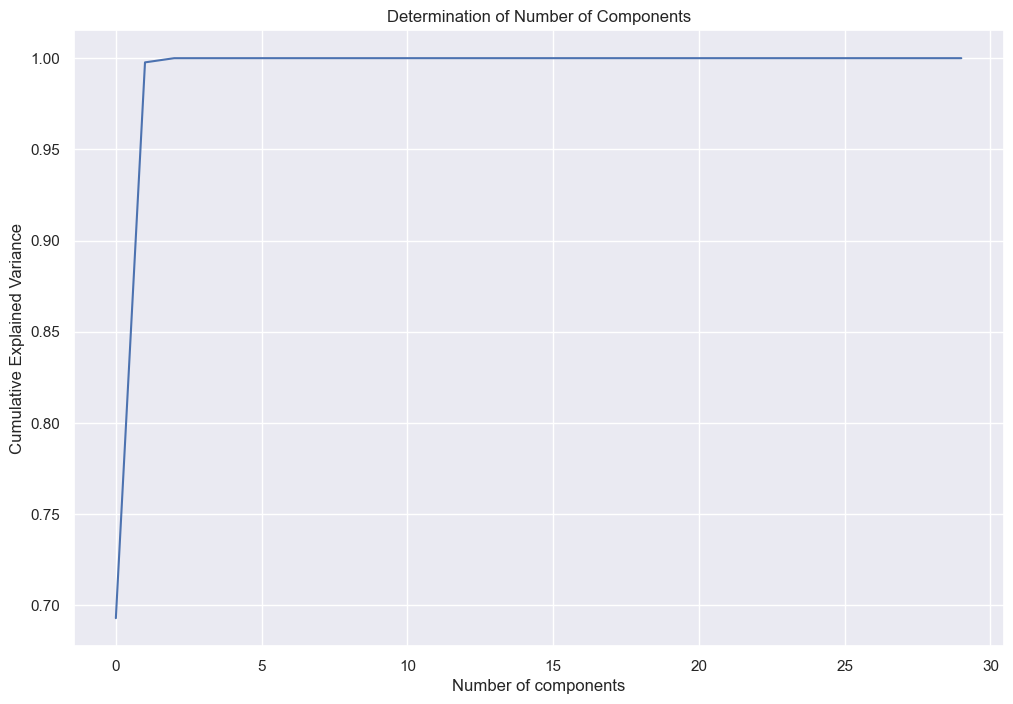

In [85]:
# Creating a PCA object and fitting it to the training data.
# This will compute the principal components for the training data (X_train).
from sklearn.decomposition import PCA
pca1 = PCA().fit(X_train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Determination of Number of Components')
plt.show()

In [86]:
# Initializing PCA with 4 components.
# n_components=4 means that PCA will reduce the data to 4 dimensions.
pca = PCA(n_components=2)
pca.fit(X_train)
reduced_X = pca.transform(X_train)
print(f'Shape of reduced data: - {reduced_X.shape}')

Shape of reduced data: - (1176, 2)


In [87]:
# Visualizing the reduced dataset
reduced_Test = pca.transform(X_test)
print(f'Shape of reduced data: - {reduced_Test.shape}')

Shape of reduced data: - (294, 2)


In [88]:
# Creating a Logistic Regression model to use with 
# the reduced dimensionality data from PCA.
pca_lr = LogisticRegression()
pca_lr.fit(reduced_X, y_train)
pred_lr_pca = pca_lr.predict(reduced_Test)

In [89]:
from sklearn.metrics import f1_score
# Calculating the weighted F1 score for the true and predicted labels.
# The 'weighted' average takes into account label imbalance
# by weighting the F1 score of each class by its support.
def metric(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} Confusion Matrix:\n{cm}")
    print(f"{model_name} F1 Score: {f1}")

# Assuming that the y_test and pred_lr_pca from the model
metric('PCA: Logistic Regression',y_test, pred_lr_pca)

PCA: Logistic Regression Confusion Matrix:
[[247   0]
 [ 47   0]]
PCA: Logistic Regression F1 Score: 0.7671482641115597


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Running differents model from the PCA
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

In [43]:
# Implementing the model,and displaying the accurancy
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model,reduced_X,y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.820578 (0.002447)
LDA: 0.820578 (0.002447)
KNN: 0.794191 (0.018807)
NB: 0.820578 (0.002447)


# LDA

In [49]:
y = Employee['Attrition']

x = Employee.drop('Attrition', axis=1)

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming 'x' is your feature set and 'y' is your target variable
# Make sure 'x' and 'y' are correctly defined

# Determine the appropriate number of components
n_classes = len(set(y))  # Number of unique classes in the target variable
n_features = x.shape[1]  # Number of features
n_components = min(n_classes - 1, n_features)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_r2 = lda.fit(x, y).transform(x)




In [51]:
print(X_r2.shape)


(1470, 1)


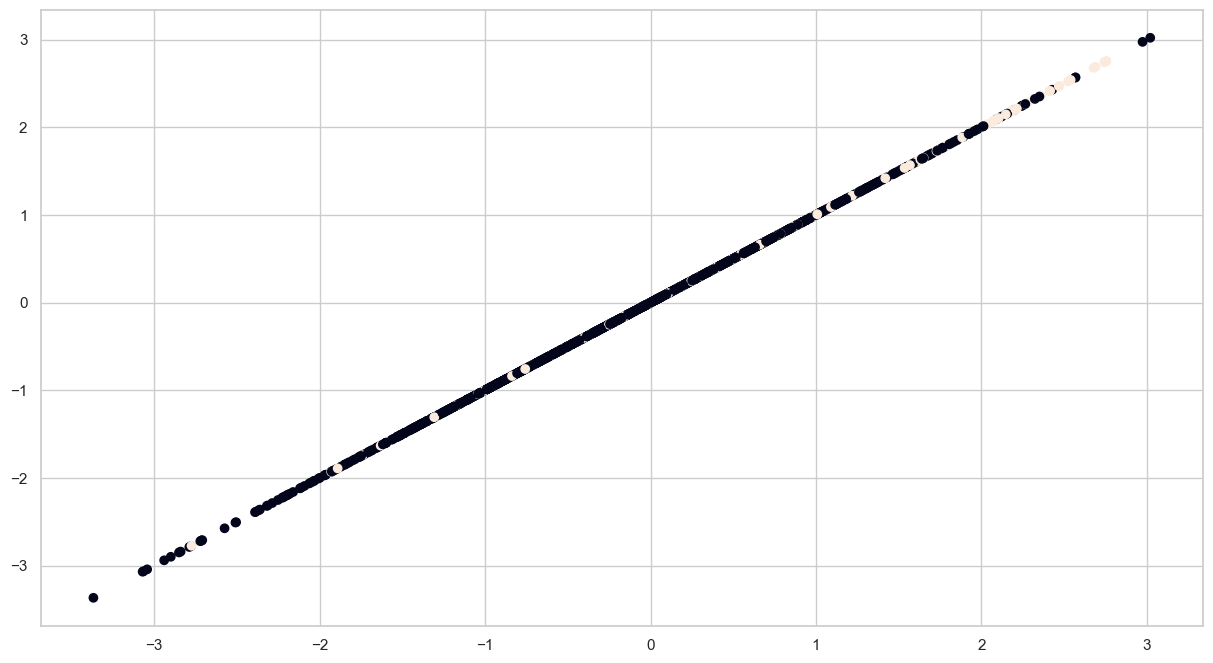

In [52]:
# importing the required module
import matplotlib.pyplot as plt
# plot size
plt.figure(figsize=(15, 8))
# plotting the graph
plt.scatter(X_r2[:,0],X_r2[:,0],  c=Employee.Attrition)
plt.show()

<Axes: xlabel='class', ylabel='ld1'>

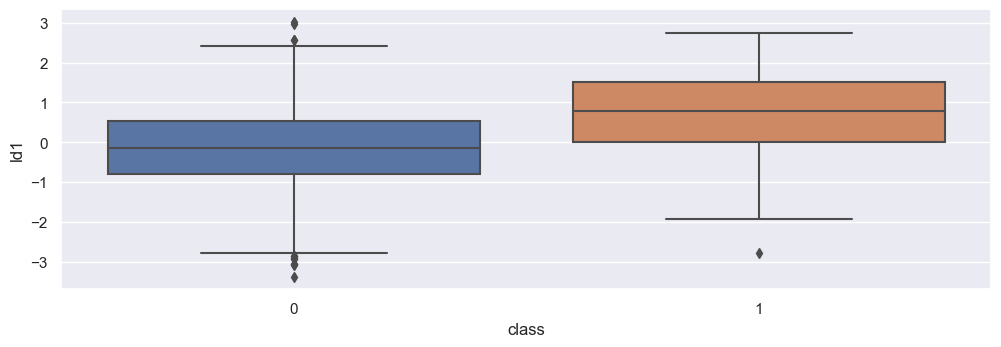

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
sns.set(rc={'figure.figsize':(12,8)})

# Creating subplots
plt.subplot(2, 1, 1)  # Subplot 1
sns.boxplot(x='class', y='ld1', data=df)


In [54]:
df

,ld1,ld2,class
0,1.977070,1.977070,1
1,-0.044920,-0.044920,0
2,1.442944,1.442944,1
3,0.767170,0.767170,0
4,1.314117,1.314117,0
...,...,...,...
1465,-0.577077,-0.577077,0
1466,-0.699359,-0.699359,0
1467,1.357834,1.357834,0
1468,-0.687359,-0.687359,0


# Descriptive Statistic

In [57]:
# Descriptive statistics for numerical variables
numerical_descriptive_stats = Employee.describe().T

# Adding mode to the descriptive statistics (mode is calculated separately as it's not part of describe())
modes = Employee.mode().iloc[0]
numerical_descriptive_stats['mode'] = modes

numerical_descriptive_stats[['mean', '50%', 'mode', 'std', 'min', 'max']]


,mean,50%,mode,std,min,max
Age,36.466937,34.951950,34.951950,9.388288,14.544608,69.402515
Attrition,0.175510,0.000000,0.000000,0.380532,0.000000,1.000000
BusinessTravel,1.600680,2.000000,2.000000,0.670592,0.000000,2.000000
DailyRate,800.122915,782.958705,782.958705,392.811161,86.828045,1784.394456
Department,1.195238,1.000000,1.000000,0.549129,0.000000,2.000000
DistanceFromHome,8.874068,6.920808,6.920808,7.785207,0.750112,33.684424
Education,2.932668,3.015658,3.015658,1.017519,0.770362,6.285161
EducationField,2.161224,2.000000,1.000000,1.382274,0.000000,5.000000
EnvironmentSatisfaction,2.742530,2.887313,2.887313,1.072754,0.759655,5.254672
Gender,0.632653,1.000000,1.000000,0.482246,0.000000,1.000000


In [58]:
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,...,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,...,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,...,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


In [59]:
# Identifying key variables for analysis
key_variables = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'YearsAtCompany']

# Descriptive statistics for key variables
key_var_descriptive_stats = Employee[key_variables].describe().T

# Adding mode to the descriptive statistics for key variables
key_var_modes = Employee[key_variables].mode().iloc[0]
key_var_descriptive_stats['mode'] = key_var_modes

key_var_descriptive_stats[['mean', '50%', 'mode', 'std', 'min', 'max']]


,mean,50%,mode,std,min,max
JobSatisfaction,2.733248,2.895032,2.895032,1.089233,0.724192,5.251277
EnvironmentSatisfaction,2.742530,2.887313,2.887313,1.072754,0.759655,5.254672
RelationshipSatisfaction,2.737511,2.891235,2.891235,1.059892,0.720696,5.092280
PerformanceRating,3.140864,3.064551,3.064551,0.452298,2.116951,5.013371
YearsAtCompany,6.782477,5.422160,5.422160,5.754185,0.000000,36.848408


In [60]:
# Descriptive statistics for 'JobSatisfaction'
job_satisfaction_stats = Employee['JobSatisfaction'].describe()
job_satisfaction_mode = Employee['JobSatisfaction'].mode()[0]

# Creating a summary for 'JobSatisfaction'
job_satisfaction_summary = job_satisfaction_stats.to_frame()
job_satisfaction_summary.loc['mode'] = job_satisfaction_mode

job_satisfaction_summary.T


,count,mean,std,min,25%,50%,75%,max,mode
JobSatisfaction,1470.0,2.733248,1.089233,0.724192,1.935855,2.895032,3.552882,5.251277,2.895032


In [61]:
import scipy.stats as stats

# ANOVA Test: Job Satisfaction Across Different Departments
anova_data = Employee[['JobSatisfaction', 'Department']].dropna()
groups = anova_data['Department'].unique()
anova_groups = [anova_data['JobSatisfaction'][anova_data['Department'] == group] for group in groups]

# Performing the ANOVA test
anova_result = stats.f_oneway(*anova_groups)

# Independent Samples t-test: Impact of Overtime on Job Satisfaction
ttest_data = Employee[['JobSatisfaction', 'OverTime']].dropna()
overtime_yes = ttest_data['JobSatisfaction'][ttest_data['OverTime'] == 'Yes']
overtime_no = ttest_data['JobSatisfaction'][ttest_data['OverTime'] == 'No']

# Performing the t-test
ttest_result = stats.ttest_ind(overtime_yes, overtime_no)

anova_result, ttest_result


(F_onewayResult(statistic=2.9520556388377326, pvalue=0.05254259606306379),
 TtestResult(statistic=nan, pvalue=nan, df=nan))

In [62]:
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,...,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,...,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,...,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,...,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,...,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,3.015658,3,3.171444,1,...,2.968558,3.020184,0.962354,9.306742,3.451951,2.819336,5.436125,2.021736,0.000000,2.939240
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,4.284094,1,...,2.800889,1.014690,0.923291,9.306742,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,6.920808,3.478895,1,2.152282,1,...,3.064551,1.952083,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,34.951950,0,1,995.977086,0,2.094496,2.956093,3,4.095580,1,...,3.221402,4.182100,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,2.939240


In [63]:
pd.set_option('display.max_columns', None)
Employee.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,2.146294,1,93.827486,3.426960,2.464492,7,3.397665,2,6438.949336,20845.103714,7.077818,1,9.898765,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,6.920808,1.035333,1,3.470803,1,52.304157,1.813458,1.788697,6,1.584059,1,4457.659622,24877.898697,1.114423,0,14.495151,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,3.979420,1,87.271332,1.877226,0.833488,2,3.301009,2,2124.545220,2262.942954,5.539591,1,15.401596,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,3.734705,0,56.378982,2.932646,1.095372,6,3.220844,1,2771.699080,27189.905714,0.772793,1,9.757546,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,1.079412,1,40.433887,3.117739,0.937746,2,1.697330,1,3254.601575,17675.541599,10.118125,0,11.920147,3.282183,2.891235,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


# Machine learning

In [ ]:
# Visualazing the Death distrbution
# We can se that is very imbalanced
ax = sns.countplot(x=Employee['Attrition'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=14)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Applying the under-sampling on the dataset.
# This will reduce the number of instances in the majority class to match
# the number in the minority class.
rand_under = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

In [ ]:
# Visualazing after sampling the data
ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=14)

reduced_X, y_train

In [44]:
# Splitting the resampled dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y_train, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((940, 2), (236, 2), (940,), (236,))

In [46]:
# Training the Logistic Regression model on the resampled training data.
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy :", log_reg.score(X_test, y_test))

Logistic Regression Accuracy : 0.8050847457627118


In [47]:
# This instance 'log_reg' will be used to train the model and make predictions.
log_reg = LogisticRegression()

# Evaluating the model on the test data.
log_reg.fit(X_train, y_train)
print("Logistic Regression Accuracy :", log_reg.score(X_test, y_test))

Logistic Regression Accuracy : 0.8050847457627118


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

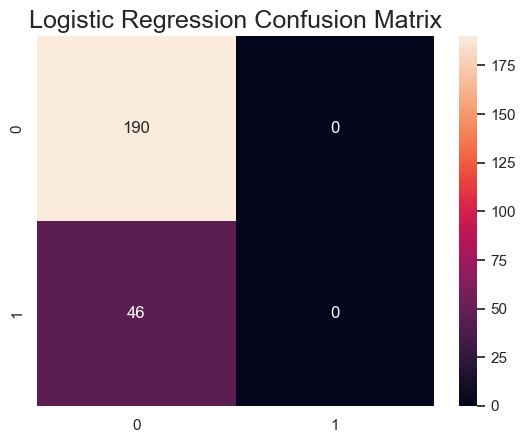

In [48]:
# Visualazing the confusion Matrix
# We can see that are a lot true negatives
# This can be for imbalanced data
sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Re-importing NumPy
import numpy as np

# Since the dataset is transformed, we need to retrieve feature names after encoding
# Getting feature names from one-hot encoding
encoded_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
features = np.concatenate([numerical_cols, encoded_features])

# Target variable
target = 'Attrition'

# Splitting the dataset into features (X) and target (y)
X = pd.DataFrame(data_preprocessed, columns=features)
y = data[target].apply(lambda x: 1 if x == 'Yes' else 0)  # Converting 'Yes'/'No' to 1/0

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Getting feature importance
feature_importance = rf.feature_importances_

# Combining feature names with their importance
features_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sorting the features by their importance
sorted_features = features_importance_df.sort_values(by='Importance', ascending=False)
sorted_features.head(10)  # Displaying the top 10 features


In [ ]:
Employee

# Artificial Neural Networks

In [64]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(Employee)

In [65]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(Employee)

df_scaled = pd.DataFrame(df_scaled, columns=Employee.columns)

df_scaled['Attrition'] = Employee['Attrition']
df = df_scaled

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [66]:
df_scaled['Attrition'] = Employee['Attrition']
df = df_scaled

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [68]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Attrition']
y = df.loc[:, 'Attrition']

X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,0.595676,0.483825,1.466022,-1.009610,-1.142731,-0.840369,-0.555988,0.762001,1.387484,0.924989,0.391277,0.948220,0.610194,1.30578,0.011659,0.941619,1.885516,1.652563,-1.400352,-0.654587,-1.627775,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,-0.896052,-1.332765,-0.355662,-0.250979,-1.865303,-0.840369,0.679112,0.762001,-0.651834,-1.294890,-0.240658,0.543374,-1.055404,-0.12775,-0.424240,1.526604,-0.603222,-0.605121,-0.189766,2.166160,1.486031,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,0.595676,1.028925,-0.355662,-0.857739,-0.800127,1.330707,1.153397,0.762001,1.065494,-1.207157,-1.133871,-1.076008,0.521426,1.30578,-0.937544,-1.753853,1.243559,1.652563,0.048971,-0.795534,-0.382201,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,-0.896052,1.407337,1.466022,-0.762759,0.725546,-0.840369,0.925200,-1.312335,-0.451709,0.244904,-0.888985,0.543374,0.447803,-0.12775,-0.795165,1.861976,-0.745797,1.652563,-1.437546,-0.821172,0.275668,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0.595676,-0.802362,-0.355662,-0.884685,-1.781577,0.607015,-1.550853,0.762001,-1.234814,0.499558,-1.036380,-1.076008,-0.951377,-0.12775,-0.688922,0.481852,3.154345,-0.605121,-0.867965,0.312552,0.145086,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,-0.896052,0.290159,-0.355662,1.641341,0.081589,0.607015,0.399961,0.762001,-0.031526,0.850307,-0.048829,-1.076008,1.318788,-0.12775,-0.787409,-0.185182,0.634970,-0.605121,0.710987,-0.381088,0.266790,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0.595676,-0.574130,-0.355662,-0.365739,-1.779153,0.607015,1.437504,0.762001,-1.263867,-0.984962,0.454854,-1.885699,0.148581,-0.12775,-0.314366,0.967881,-0.355162,-0.605121,-0.137835,-0.751919,-1.626022,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0.595676,-1.651780,-0.355662,-0.250979,0.537004,-0.840369,-0.550405,0.762001,1.278265,2.256643,-0.076159,-0.266317,-0.533777,-0.12775,0.049257,-0.013844,-0.643621,1.652563,0.929395,-0.168781,-0.741298,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,-0.896052,0.498766,-2.177347,-0.871124,0.023029,0.607015,1.261715,0.762001,-0.317571,-1.011057,-0.113177,0.948220,0.148581,-0.12775,-0.176150,-0.364940,-0.404040,-0.605121,-0.601894,0.178123,1.363421,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521


In [69]:
# split the data into training and testing
reduced_X, y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

In [71]:
# Fixing a random seed ensures reproducible results
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [72]:
from keras.models import Sequential
model = Sequential()

In [77]:
# Let's add the first hidden layer:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 30))

In [78]:
# Let's add our second hidden layer:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [79]:
# Then, we can run the compile() function as follows:
    # Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [91]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs


model.fit(reduced_X, y_train, epochs = 2)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\feder\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\feder\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\feder\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\feder\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\feder\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\feder\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 2)


In [ ]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))